In [1]:
import pandas as pd
import string
import re
import nltk
import torch
from transformers import BertModel, BertTokenizer
import sklearn
import numpy as np
import tensorflow
import scikeras

c:\Users\bella\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df_extrovert_introvert_joined_sampled = pd.read_csv('data\df_extrovert_introvert_joined_sampled.csv')
df_feeling_thinking_joined_sampled =  pd.read_csv('data\df_feeling_thinking_joined_sampled.csv')
df_judging_perceiving_joined_sampled=  pd.read_csv('data\df_judging_perceiving_joined_sampled.csv')
df_sensing_intuitive_joined_sampled =  pd.read_csv('data\df_sensing_intuitive_joined_sampled.csv')

In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Join the tokens back into a single string
    processed_text = ' '.join(tokens)

    return processed_text



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bella\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bella\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
# apply preprocessing to undersampled dataset

df_extrovert_introvert_joined_sampled_preprocessed = df_extrovert_introvert_joined_sampled.copy()
df_extrovert_introvert_joined_sampled_preprocessed['preprocessed_post']=df_extrovert_introvert_joined_sampled['post'].apply(preprocess_text)
df_extrovert_introvert_joined_sampled_preprocessed

,auhtor_ID,post,extrovert,preprocessed_post
0,t2_10j5wx,Mother told me not to lie... I don't care. I a...,1,mother told lie dont care actually want feel s...
1,t2_10yl6g2x,I had a couple guys try to bully me when I cam...,1,couple guys try bully came high school laughed...
2,t2_11a78w,bruh i thought this was a meme until i saw op'...,1,bruh thought meme saw ops replies dumb ways di...
3,t2_11dfyb,I look girly and I look boyish when I talk. I ...,1,look girly look boyish talk look like femme fa...
4,t2_11xick,"With respect, I don’t see how this can be the ...",1,respect dont see case unless working pretty sp...
...,...,...,...,...
795,t2_tjqum,I wanted to downvote because the thought of th...,0,wanted downvote thought makes wan na move moon...
796,t2_lfu7v,Best thing you can do is leave and come back. ...,0,best thing leave come back corporations appare...
797,t2_2b9mn0cu,I believe it's about getting fully psionic pop...,0,believe getting fully psionic pops bit loki li...
798,t2_5bam0,"2 for sure, not even close It's not ""difficult...",0,sure even close difficulty seeing obvious red ...


In [17]:
# apply preprocessing to undersampled dataset

df_feeling_thinking_joined_sampled_preprocessed = df_feeling_thinking_joined_sampled.copy()
df_feeling_thinking_joined_sampled_preprocessed['preprocessed_post']=df_feeling_thinking_joined_sampled['post'].apply(preprocess_text)
df_feeling_thinking_joined_sampled_preprocessed

,auhtor_ID,post,feeling,preprocessed_post
0,t2_10aaboz1,Kobe Bryant and his daughter Pretty much I’ve ...,1,kobe bryant daughter pretty much ive found im ...
1,t2_10kvyn,I am chronically exhausted by other people but...,1,chronically exhausted people concerned feeling...
2,t2_1196mc,some of us INFJs are super shy / will not make...,1,us infjs super shy make first move risks killi...
3,t2_12q3th,I understand well I’d be happy to maybe featur...,1,understand well id happy maybe feature content...
4,t2_12qddi,My ex and best friend displays that “abusive” ...,1,ex best friend displays abusive behavior selfh...
...,...,...,...,...
1305,t2_7nd3z48y,I don’t care. I’m too tired. I will do what I ...,0,dont care im tired want wont anything dont wan...
1306,t2_1xpanblf,Yiiiikes. I wondered honestly if they'd care m...,0,yiiiikes wondered honestly theyd care scammy m...
1307,t2_y1wsv,Sounds more like limerance to me rather than l...,0,sounds like limerance rather love youre still ...
1308,t2_3es0x9g2,fake Who doesn't? Should have gone with the wi...,0,fake doesnt gone wine username checks caloriem...


In [18]:
# apply preprocessing to undersampled dataset

df_judging_perceiving_joined_sampled_preprocessed = df_judging_perceiving_joined_sampled.copy()
df_judging_perceiving_joined_sampled_preprocessed['preprocessed_post']=df_judging_perceiving_joined_sampled['post'].apply(preprocess_text)
df_judging_perceiving_joined_sampled_preprocessed

,auhtor_ID,post,judging,preprocessed_post
0,t2_100mhwy0,"S'ils sont comme ça, c'est souvent que leurs m...",0,sils sont comme cest souvent que leurs maitres...
1,t2_10511a,All I know is that Rose is going home Well he ...,0,know rose going home well didnt study hard ok ...
2,t2_10j5wx,Mother told me not to lie... I don't care. I a...,0,mother told lie dont care actually want feel s...
3,t2_10q5jy,What kind of worked for me was when I thought ...,0,kind worked thought need something right away ...
4,t2_10s3a9,"I definitely, absolutely, 100% relate. I feel ...",0,definitely absolutely relate feel way often tr...
...,...,...,...,...
1459,t2_3kchhjru,"Alexander. I liked some of the visuals, and th...",1,alexander liked visuals realed gay ass tease a...
1460,t2_pm1g85e,Is the AI .. INTJ? I feel you.. Now imagine wh...,1,ai intj feel imagine look work like years cybo...
1461,t2_8gk25v6f,Hi Call 911 They are super horny 25/7 I want t...,1,hi call super horny want kill randomly beats r...
1462,t2_g0w7vyto,33 sounds like such a good age. I can't wait t...,1,sounds like good age cant wait till im im glad...


In [19]:
# apply preprocessing to undersampled dataset

df_sensing_intuitive_joined_sampled_preprocessed = df_sensing_intuitive_joined_sampled.copy()
df_sensing_intuitive_joined_sampled_preprocessed['preprocessed_post']=df_sensing_intuitive_joined_sampled['post'].apply(preprocess_text)
df_sensing_intuitive_joined_sampled_preprocessed

,auhtor_ID,post,sensing,preprocessed_post
0,t2_10c5y8,"&gt;but peeps still figured those out. Yeah, v...",1,gtbut peeps still figured yeah via datamining ...
1,t2_10yl6g2x,I had a couple guys try to bully me when I cam...,1,couple guys try bully came high school laughed...
2,t2_11wkz33k,I think we're finally in a state we're the mar...,1,think finally state marksmen class fine par pe...
3,t2_12t59p,"My kinda guy ‘No, sir, really. You want some p...",1,kinda guy sir really want plausible deniabilit...
4,t2_170dhg,bUT tHey wAnTEd TO oVeRthROw tHe GoVErNmeNT! T...,1,wanted overthrow government new snow globe voi...
...,...,...,...,...
525,t2_doybmb4f,Do you have anything else that you enjoy doing...,0,anything else enjoy seem bit focused confident...
526,t2_la6hv01n,I've encountered 3 men with this sort of behav...,0,ive encountered men sort behavior verified enf...
527,t2_3xyzh5e,I’m sorry they are not supporting you. You des...,0,im sorry supporting deserve cared legos kick s...
528,t2_4qblm1wt,Yeah maybe :D I already forgot the details but...,0,yeah maybe already forgot details still vaguel...


In [20]:
# export to csv's

df_extrovert_introvert_joined_sampled_preprocessed.to_csv('data/df_extrovert_introvert_joined_sampled_preprocessed.csv', index=False)
df_feeling_thinking_joined_sampled_preprocessed.to_csv('data/df_feeling_thinking_joined_sampled_preprocessed.csv', index=False)
df_judging_perceiving_joined_sampled_preprocessed.to_csv('data/df_judging_perceiving_joined_sampled_preprocessed.csv', index=False)
df_sensing_intuitive_joined_sampled_preprocessed.to_csv('data/df_sensing_intuitive_joined_sampled_preprocessed.csv', index=False)

In [10]:
# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Function to obtain BERT embeddings for a text
def get_bert_embeddings(text):
    # Tokenize input text and convert to tensor
    tokens = tokenizer.encode(text, add_special_tokens=True, return_tensors='pt', max_length=512, truncation=True)

    # Get BERT embeddings
    with torch.no_grad():
        outputs = bert_model(tokens)
        embeddings = outputs.last_hidden_state

    # Average the embeddings across tokens (you can modify this based on your needs)
    avg_embedding = torch.mean(embeddings, dim=1).squeeze().numpy()

    return avg_embedding


In [11]:
# get bert embeddings to preprocessed, undersampled dataset

df_extrovert_introvert_joined_sampled_preprocessed['bert_embeddings'] = df_extrovert_introvert_joined_sampled_preprocessed['post'].apply(get_bert_embeddings)

In [12]:
# get bert embeddings to preprocessed, undersampled dataset

df_feeling_thinking_joined_sampled_preprocessed['bert_embeddings'] = df_feeling_thinking_joined_sampled_preprocessed['post'].apply(get_bert_embeddings)

In [13]:
# get bert embeddings to preprocessed, undersampled dataset

df_judging_perceiving_joined_sampled_preprocessed['bert_embeddings'] = df_judging_perceiving_joined_sampled_preprocessed['post'].apply(get_bert_embeddings)

In [14]:
# get bert embeddings to preprocessed, undersampled dataset

df_sensing_intuitive_joined_sampled_preprocessed['bert_embeddings'] = df_sensing_intuitive_joined_sampled_preprocessed['post'].apply(get_bert_embeddings)

# NN prediction on each dichotomy on preprocessed and undersampled dataset

test dataset is df_all_cleaned which contains 155 rows, only consists of authors who have a post in all four csv's extrovert_introvert.csv, feeling_thinking.csv, judging_perceiving.csv, sensing_intuitive.csv 
training dataset is the remaining portion of extrovert_introvert.csv, feeling_thinking.csv, judging_perceiving.csv, sensing_intuitive.csv after removing those 155 rows. they are undersampled and preprocessed. 

In [15]:
df_labels =  pd.DataFrame()
df_labels['extrovert']= df_extrovert_introvert_joined_sampled_preprocessed['extrovert']
df_labels['feeling']= df_feeling_thinking_joined_sampled_preprocessed['feeling']
df_labels['judging']= df_judging_perceiving_joined_sampled_preprocessed['judging']
df_labels['sensing']= df_sensing_intuitive_joined_sampled_preprocessed['sensing']


In [16]:
df_all_cleaned = pd.read_csv(r'C:\Users\bella\Downloads\Y3Q2 langai\df_all_cleaned.csv')

In [17]:
df_all_cleaned = df_all_cleaned.drop(['post_feeling', 'post_judging', 'post_sensing'], axis=1)
df_all_cleaned = df_all_cleaned.rename(columns={'post_extrovert': 'post'})
df_all_cleaned

,auhtor_ID,post,extrovert,feeling,judging,sensing
0,t2_12bhu7,I wear a Lorna shore shirt out alot in public ...,1.0,1.0,0.0,0.0
1,t2_12jbpd,I'd say this is a very accurate characterizati...,1.0,0.0,0.0,0.0
2,t2_12uwr5,Ya know like most people with home decorations...,0.0,0.0,1.0,0.0
3,t2_12zm15,It's true tho. They're kinda more interesting ...,0.0,1.0,0.0,0.0
4,t2_13cjjl,"Yeah, but that's one of the things that make m...",0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
150,t2_vfp8y,so change profession then. this would be inadm...,0.0,0.0,1.0,0.0
151,t2_w0842,The technological singularity. And the possibi...,0.0,0.0,1.0,0.0
152,t2_w6rgl,Dear God man. Chill. I'm not Einstein or Hawki...,0.0,0.0,1.0,0.0
153,t2_wilcwvo,That's what a fake lib would say [Human blood ...,1.0,0.0,0.0,0.0


In [18]:
df_all_cleaned['processed_post'] = df_all_cleaned['post'].apply(preprocess_text)
df_all_cleaned

,auhtor_ID,post,extrovert,feeling,judging,sensing,processed_post
0,t2_12bhu7,I wear a Lorna shore shirt out alot in public ...,1.0,1.0,0.0,0.0,wear lorna shore shirt alot public lewd long s...
1,t2_12jbpd,I'd say this is a very accurate characterizati...,1.0,0.0,0.0,0.0,id say accurate characterization ni users read...
2,t2_12uwr5,Ya know like most people with home decorations...,0.0,0.0,1.0,0.0,ya know like people home decorations could sav...
3,t2_12zm15,It's true tho. They're kinda more interesting ...,0.0,1.0,0.0,0.0,true tho theyre kinda interesting buuuut issue...
4,t2_13cjjl,"Yeah, but that's one of the things that make m...",0.0,0.0,0.0,1.0,yeah thats one things make better objectively ...
...,...,...,...,...,...,...,...
150,t2_vfp8y,so change profession then. this would be inadm...,0.0,0.0,1.0,0.0,change profession would inadmissible country p...
151,t2_w0842,The technological singularity. And the possibi...,0.0,0.0,1.0,0.0,technological singularity possibility contribu...
152,t2_w6rgl,Dear God man. Chill. I'm not Einstein or Hawki...,0.0,0.0,1.0,0.0,dear god man chill im einstein hawking serious...
153,t2_wilcwvo,That's what a fake lib would say [Human blood ...,1.0,0.0,0.0,0.0,thats fake lib would say human blood water url...


In [19]:
df_all_cleaned['bert_embeddings'] = df_all_cleaned['post'].apply(get_bert_embeddings)
df_all_cleaned

,auhtor_ID,post,extrovert,feeling,judging,sensing,processed_post,bert_embeddings
0,t2_12bhu7,I wear a Lorna shore shirt out alot in public ...,1.0,1.0,0.0,0.0,wear lorna shore shirt alot public lewd long s...,"[0.03740044, 0.03744348, 0.40402788, -0.154586..."
1,t2_12jbpd,I'd say this is a very accurate characterizati...,1.0,0.0,0.0,0.0,id say accurate characterization ni users read...,"[-0.122634806, 0.06978733, 0.23516777, -0.1674..."
2,t2_12uwr5,Ya know like most people with home decorations...,0.0,0.0,1.0,0.0,ya know like people home decorations could sav...,"[0.10358047, -0.079817355, 0.4862674, 0.006832..."
3,t2_12zm15,It's true tho. They're kinda more interesting ...,0.0,1.0,0.0,0.0,true tho theyre kinda interesting buuuut issue...,"[-0.11131706, 0.070213296, 0.5168624, 0.017204..."
4,t2_13cjjl,"Yeah, but that's one of the things that make m...",0.0,0.0,0.0,1.0,yeah thats one things make better objectively ...,"[0.21926472, 0.11031033, 0.28619415, 0.1073027..."
...,...,...,...,...,...,...,...,...
150,t2_vfp8y,so change profession then. this would be inadm...,0.0,0.0,1.0,0.0,change profession would inadmissible country p...,"[-0.17524596, 0.1841626, 0.44777465, -0.118973..."
151,t2_w0842,The technological singularity. And the possibi...,0.0,0.0,1.0,0.0,technological singularity possibility contribu...,"[-0.025105778, -0.08084041, 0.3463775, -0.0189..."
152,t2_w6rgl,Dear God man. Chill. I'm not Einstein or Hawki...,0.0,0.0,1.0,0.0,dear god man chill im einstein hawking serious...,"[0.088415004, 0.22571912, 0.38455746, -0.03194..."
153,t2_wilcwvo,That's what a fake lib would say [Human blood ...,1.0,0.0,0.0,0.0,thats fake lib would say human blood water url...,"[0.05957357, 0.10176626, 0.3839616, -0.0742901..."


In [56]:
df_all_cleaned['extrovert'] = df_all_cleaned['extrovert'].astype(int)
df_all_cleaned['feeling'] = df_all_cleaned['feeling'].astype(int)
df_all_cleaned['judging'] = df_all_cleaned['judging'].astype(int)
df_all_cleaned['sensing'] = df_all_cleaned['sensing'].astype(int)
df_all_cleaned

,auhtor_ID,post,extrovert,feeling,judging,sensing,processed_post,bert_embeddings
0,t2_12bhu7,I wear a Lorna shore shirt out alot in public ...,1,1,0,0,wear lorna shore shirt alot public lewd long s...,"[0.03740044, 0.03744348, 0.40402788, -0.154586..."
1,t2_12jbpd,I'd say this is a very accurate characterizati...,1,0,0,0,id say accurate characterization ni users read...,"[-0.122634806, 0.06978733, 0.23516777, -0.1674..."
2,t2_12uwr5,Ya know like most people with home decorations...,0,0,1,0,ya know like people home decorations could sav...,"[0.10358047, -0.079817355, 0.4862674, 0.006832..."
3,t2_12zm15,It's true tho. They're kinda more interesting ...,0,1,0,0,true tho theyre kinda interesting buuuut issue...,"[-0.11131706, 0.070213296, 0.5168624, 0.017204..."
4,t2_13cjjl,"Yeah, but that's one of the things that make m...",0,0,0,1,yeah thats one things make better objectively ...,"[0.21926472, 0.11031033, 0.28619415, 0.1073027..."
...,...,...,...,...,...,...,...,...
150,t2_vfp8y,so change profession then. this would be inadm...,0,0,1,0,change profession would inadmissible country p...,"[-0.17524596, 0.1841626, 0.44777465, -0.118973..."
151,t2_w0842,The technological singularity. And the possibi...,0,0,1,0,technological singularity possibility contribu...,"[-0.025105778, -0.08084041, 0.3463775, -0.0189..."
152,t2_w6rgl,Dear God man. Chill. I'm not Einstein or Hawki...,0,0,1,0,dear god man chill im einstein hawking serious...,"[0.088415004, 0.22571912, 0.38455746, -0.03194..."
153,t2_wilcwvo,That's what a fake lib would say [Human blood ...,1,0,0,0,thats fake lib would say human blood water url...,"[0.05957357, 0.10176626, 0.3839616, -0.0742901..."


In [57]:
df_extrovert_introvert_joined_sampled_preprocessed

,auhtor_ID,post,extrovert,preprocessed_post,bert_embeddings
0,t2_10j5wx,Mother told me not to lie... I don't care. I a...,1,mother told lie dont care actually want feel s...,"[-0.006608721, 0.019449431, 0.4505973, -0.0573..."
1,t2_10yl6g2x,I had a couple guys try to bully me when I cam...,1,couple guys try bully came high school laughed...,"[-0.060044073, 0.0022919104, 0.34724367, -0.13..."
2,t2_11a78w,bruh i thought this was a meme until i saw op'...,1,bruh thought meme saw ops replies dumb ways di...,"[0.03848826, 1.7973594e-05, 0.5102863, 0.03368..."
3,t2_11dfyb,I look girly and I look boyish when I talk. I ...,1,look girly look boyish talk look like femme fa...,"[-0.10429709, 0.14243895, 0.44810298, 0.105513..."
4,t2_11xick,"With respect, I don’t see how this can be the ...",1,respect dont see case unless working pretty sp...,"[0.025918998, 0.15715271, 0.1911881, -0.015398..."
...,...,...,...,...,...
795,t2_tjqum,I wanted to downvote because the thought of th...,0,wanted downvote thought makes wan na move moon...,"[-0.09599754, -0.20567322, 0.59235513, -0.2136..."
796,t2_lfu7v,Best thing you can do is leave and come back. ...,0,best thing leave come back corporations appare...,"[0.05184161, 0.13914949, 0.4454034, -0.0802947..."
797,t2_2b9mn0cu,I believe it's about getting fully psionic pop...,0,believe getting fully psionic pops bit loki li...,"[0.009137136, 0.097120225, 0.38041216, 0.07166..."
798,t2_5bam0,"2 for sure, not even close It's not ""difficult...",0,sure even close difficulty seeing obvious red ...,"[-0.002168227, 0.20878167, 0.35289073, 0.03588..."


In [72]:
# Train-test split
X_train = np.vstack(df_extrovert_introvert_joined_sampled_preprocessed['bert_embeddings'])
X_test = np.vstack(df_all_cleaned['bert_embeddings'])
y_train = np.vstack(df_extrovert_introvert_joined_sampled_preprocessed['extrovert'])
y_test = np.vstack(df_all_cleaned['extrovert'])

In [73]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(800, 768) (800, 1) (155, 768) (155, 1)


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Build a simple neural network model
model = Sequential([
    Dense(800, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(155, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Predictions
e_predictions = model.predict(X_test)

Epoch 1/10
41/41 [==============================] - 1s 10ms/step - loss: 0.7011 - accuracy: 0.5427 - val_loss: 0.6009 - val_accuracy: 0.7161
Epoch 2/10
41/41 [==============================] - 0s 5ms/step - loss: 0.6731 - accuracy: 0.5763 - val_loss: 0.6605 - val_accuracy: 0.6452
Epoch 3/10
41/41 [==============================] - 0s 5ms/step - loss: 0.6385 - accuracy: 0.6466 - val_loss: 0.7471 - val_accuracy: 0.4452
Epoch 4/10
41/41 [==============================] - 0s 5ms/step - loss: 0.6405 - accuracy: 0.6328 - val_loss: 0.5891 - val_accuracy: 0.7097
Epoch 5/10
41/41 [==============================] - 0s 5ms/step - loss: 0.6403 - accuracy: 0.6290 - val_loss: 0.6031 - val_accuracy: 0.7161
Epoch 6/10
41/41 [==============================] - 0s 5ms/step - loss: 0.6213 - accuracy: 0.6366 - val_loss: 0.5477 - val_accuracy: 0.7548
Epoch 7/10
41/41 [==============================] - 0s 5ms/step - loss: 0.6369 - accuracy: 0.6115 - val_loss: 0.7062 - val_accuracy: 0.5226
Epoch 8/10
41/41 [=

Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       137
           1       0.07      0.11      0.09        18

    accuracy                           0.74       155
   macro avg       0.47      0.46      0.47       155
weighted avg       0.78      0.74      0.76       155

Confusion Matrix:
[[112  25]
 [ 16   2]]


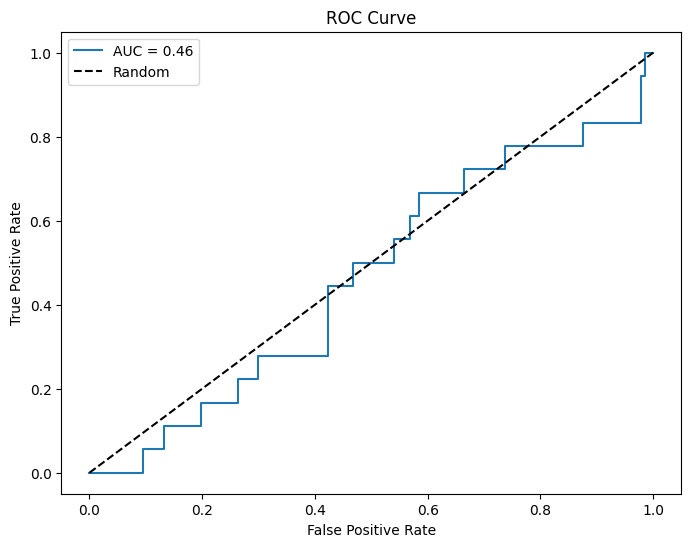

In [126]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Choose a threshold (e.g., 0.5)
threshold = 0.75

# Convert probabilities to binary predictions
e_binary_predictions = (e_predictions > threshold).astype(int)

# Evaluate accuracy
accuracy = accuracy_score(y_test, e_binary_predictions)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, e_binary_predictions))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, e_binary_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# ROC Curve and AUC
roc_auc = roc_auc_score(y_test, e_predictions)
fpr, tpr, thresholds = roc_curve(y_test, e_predictions)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [128]:
df_all_cleaned['e_predictions'] = e_binary_predictions
df_all_cleaned

,auhtor_ID,post,extrovert,feeling,judging,sensing,processed_post,bert_embeddings,e_predictions
0,t2_12bhu7,I wear a Lorna shore shirt out alot in public ...,1,1,0,0,wear lorna shore shirt alot public lewd long s...,"[0.03740044, 0.03744348, 0.40402788, -0.154586...",0
1,t2_12jbpd,I'd say this is a very accurate characterizati...,1,0,0,0,id say accurate characterization ni users read...,"[-0.122634806, 0.06978733, 0.23516777, -0.1674...",0
2,t2_12uwr5,Ya know like most people with home decorations...,0,0,1,0,ya know like people home decorations could sav...,"[0.10358047, -0.079817355, 0.4862674, 0.006832...",0
3,t2_12zm15,It's true tho. They're kinda more interesting ...,0,1,0,0,true tho theyre kinda interesting buuuut issue...,"[-0.11131706, 0.070213296, 0.5168624, 0.017204...",1
4,t2_13cjjl,"Yeah, but that's one of the things that make m...",0,0,0,1,yeah thats one things make better objectively ...,"[0.21926472, 0.11031033, 0.28619415, 0.1073027...",0
...,...,...,...,...,...,...,...,...,...
150,t2_vfp8y,so change profession then. this would be inadm...,0,0,1,0,change profession would inadmissible country p...,"[-0.17524596, 0.1841626, 0.44777465, -0.118973...",0
151,t2_w0842,The technological singularity. And the possibi...,0,0,1,0,technological singularity possibility contribu...,"[-0.025105778, -0.08084041, 0.3463775, -0.0189...",0
152,t2_w6rgl,Dear God man. Chill. I'm not Einstein or Hawki...,0,0,1,0,dear god man chill im einstein hawking serious...,"[0.088415004, 0.22571912, 0.38455746, -0.03194...",0
153,t2_wilcwvo,That's what a fake lib would say [Human blood ...,1,0,0,0,thats fake lib would say human blood water url...,"[0.05957357, 0.10176626, 0.3839616, -0.0742901...",0


In [90]:
df_all_cleaned['extrovert'].value_counts()

0    117
1     38
Name: extrovert, dtype: int64

In [93]:
df_feeling_thinking_joined_sampled_preprocessed

,auhtor_ID,post,feeling,preprocessed_post,bert_embeddings
0,t2_10aaboz1,Kobe Bryant and his daughter Pretty much I’ve ...,1,kobe bryant daughter pretty much ive found im ...,"[0.057862297, 0.041112345, 0.2041871, -0.05840..."
1,t2_10kvyn,I am chronically exhausted by other people but...,1,chronically exhausted people concerned feeling...,"[-0.06837747, 0.033211097, 0.21144958, -0.0800..."
2,t2_1196mc,some of us INFJs are super shy / will not make...,1,us infjs super shy make first move risks killi...,"[0.008670952, 0.025431989, 0.3897995, -0.06631..."
3,t2_12q3th,I understand well I’d be happy to maybe featur...,1,understand well id happy maybe feature content...,"[-0.009048518, 0.16644792, 0.41351283, -0.0332..."
4,t2_12qddi,My ex and best friend displays that “abusive” ...,1,ex best friend displays abusive behavior selfh...,"[-0.021221474, 0.18086603, 0.26588392, -0.0408..."
...,...,...,...,...,...
1305,t2_7nd3z48y,I don’t care. I’m too tired. I will do what I ...,0,dont care im tired want wont anything dont wan...,"[-0.070220314, -0.09311776, 0.40942028, 0.0547..."
1306,t2_1xpanblf,Yiiiikes. I wondered honestly if they'd care m...,0,yiiiikes wondered honestly theyd care scammy m...,"[-0.15572527, 0.19320615, 0.14507763, -0.00142..."
1307,t2_y1wsv,Sounds more like limerance to me rather than l...,0,sounds like limerance rather love youre still ...,"[0.043854196, 0.07449046, 0.4616968, 0.0023973..."
1308,t2_3es0x9g2,fake Who doesn't? Should have gone with the wi...,0,fake doesnt gone wine username checks caloriem...,"[0.1957011, 0.004462733, 0.38238943, -0.119932..."


In [94]:
# Train-test split
X_train = np.vstack(df_feeling_thinking_joined_sampled_preprocessed['bert_embeddings'])
X_test = np.vstack(df_all_cleaned['bert_embeddings'])
y_train = np.vstack(df_feeling_thinking_joined_sampled_preprocessed['feeling'])
y_test = np.vstack(df_all_cleaned['feeling'])

In [95]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1310, 768) (1310, 1) (155, 768) (155, 1)


In [110]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Build a simple neural network model
model = Sequential([
    Dense(800, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(155, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Predictions
f_predictions = model.predict(X_test)

Epoch 1/10
46/46 [==============================] - 1s 8ms/step - loss: 0.7045 - accuracy: 0.5280 - val_loss: 0.6788 - val_accuracy: 0.6129
Epoch 2/10
46/46 [==============================] - 0s 6ms/step - loss: 0.6686 - accuracy: 0.5915 - val_loss: 0.7152 - val_accuracy: 0.5097
Epoch 3/10
46/46 [==============================] - 0s 5ms/step - loss: 0.6582 - accuracy: 0.6113 - val_loss: 0.6532 - val_accuracy: 0.6323
Epoch 4/10
46/46 [==============================] - 0s 5ms/step - loss: 0.6397 - accuracy: 0.6393 - val_loss: 0.6321 - val_accuracy: 0.6387
Epoch 5/10
46/46 [==============================] - 0s 5ms/step - loss: 0.6416 - accuracy: 0.6189 - val_loss: 0.6482 - val_accuracy: 0.6710
Epoch 6/10
46/46 [==============================] - 0s 5ms/step - loss: 0.6330 - accuracy: 0.6393 - val_loss: 0.6384 - val_accuracy: 0.6903
Epoch 7/10
46/46 [==============================] - 0s 5ms/step - loss: 0.6141 - accuracy: 0.6680 - val_loss: 0.6409 - val_accuracy: 0.6323
Epoch 8/10
46/46 [==

In [97]:
df_all_cleaned['feeling'].value_counts()

0    109
1     46
Name: feeling, dtype: int64

Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       137
           1       0.25      0.06      0.09        18

    accuracy                           0.87       155
   macro avg       0.57      0.52      0.51       155
weighted avg       0.81      0.87      0.83       155

Confusion Matrix:
[[134   3]
 [ 17   1]]


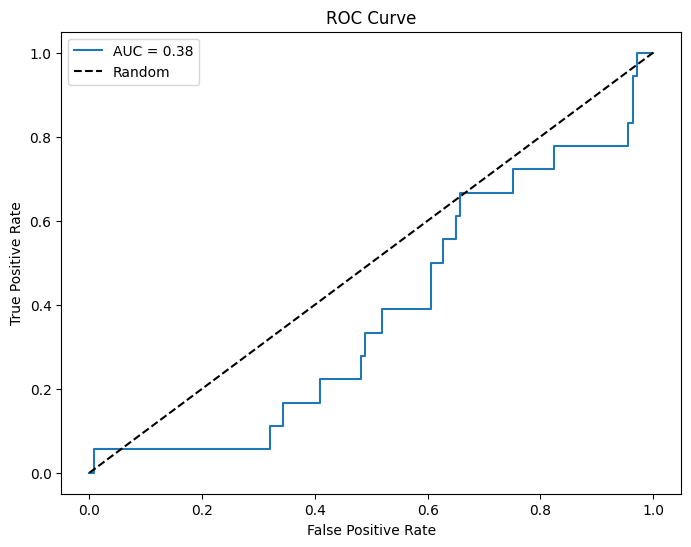

In [130]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Choose a threshold (e.g., 0.5)
threshold = 0.70

# Convert probabilities to binary predictions
f_binary_predictions = (f_predictions > threshold).astype(int)

# Evaluate accuracy
accuracy = accuracy_score(y_test, f_binary_predictions)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, f_binary_predictions))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, f_binary_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# ROC Curve and AUC
roc_auc = roc_auc_score(y_test, f_predictions)
fpr, tpr, thresholds = roc_curve(y_test, f_predictions)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [131]:
df_all_cleaned['f_predictions'] = f_binary_predictions
df_all_cleaned

,auhtor_ID,post,extrovert,feeling,judging,sensing,processed_post,bert_embeddings,e_predictions,f_predictions
0,t2_12bhu7,I wear a Lorna shore shirt out alot in public ...,1,1,0,0,wear lorna shore shirt alot public lewd long s...,"[0.03740044, 0.03744348, 0.40402788, -0.154586...",0,0
1,t2_12jbpd,I'd say this is a very accurate characterizati...,1,0,0,0,id say accurate characterization ni users read...,"[-0.122634806, 0.06978733, 0.23516777, -0.1674...",0,0
2,t2_12uwr5,Ya know like most people with home decorations...,0,0,1,0,ya know like people home decorations could sav...,"[0.10358047, -0.079817355, 0.4862674, 0.006832...",0,0
3,t2_12zm15,It's true tho. They're kinda more interesting ...,0,1,0,0,true tho theyre kinda interesting buuuut issue...,"[-0.11131706, 0.070213296, 0.5168624, 0.017204...",1,0
4,t2_13cjjl,"Yeah, but that's one of the things that make m...",0,0,0,1,yeah thats one things make better objectively ...,"[0.21926472, 0.11031033, 0.28619415, 0.1073027...",0,0
...,...,...,...,...,...,...,...,...,...,...
150,t2_vfp8y,so change profession then. this would be inadm...,0,0,1,0,change profession would inadmissible country p...,"[-0.17524596, 0.1841626, 0.44777465, -0.118973...",0,0
151,t2_w0842,The technological singularity. And the possibi...,0,0,1,0,technological singularity possibility contribu...,"[-0.025105778, -0.08084041, 0.3463775, -0.0189...",0,0
152,t2_w6rgl,Dear God man. Chill. I'm not Einstein or Hawki...,0,0,1,0,dear god man chill im einstein hawking serious...,"[0.088415004, 0.22571912, 0.38455746, -0.03194...",0,0
153,t2_wilcwvo,That's what a fake lib would say [Human blood ...,1,0,0,0,thats fake lib would say human blood water url...,"[0.05957357, 0.10176626, 0.3839616, -0.0742901...",0,0


In [105]:
df_judging_perceiving_joined_sampled_preprocessed

,auhtor_ID,post,judging,preprocessed_post,bert_embeddings
0,t2_100mhwy0,"S'ils sont comme ça, c'est souvent que leurs m...",0,sils sont comme cest souvent que leurs maitres...,"[-0.32013488, 0.13566372, 0.38529268, -0.23423..."
1,t2_10511a,All I know is that Rose is going home Well he ...,0,know rose going home well didnt study hard ok ...,"[0.044633273, -0.03378859, 0.29150534, -0.1158..."
2,t2_10j5wx,Mother told me not to lie... I don't care. I a...,0,mother told lie dont care actually want feel s...,"[-0.006608721, 0.019449431, 0.4505973, -0.0573..."
3,t2_10q5jy,What kind of worked for me was when I thought ...,0,kind worked thought need something right away ...,"[-0.10951012, -0.16205953, 0.32615322, 0.09251..."
4,t2_10s3a9,"I definitely, absolutely, 100% relate. I feel ...",0,definitely absolutely relate feel way often tr...,"[-0.055399343, 0.02229425, 0.33310056, -0.0605..."
...,...,...,...,...,...
1459,t2_3kchhjru,"Alexander. I liked some of the visuals, and th...",1,alexander liked visuals realed gay ass tease a...,"[0.013440457, 0.21933056, 0.19576144, -0.01049..."
1460,t2_pm1g85e,Is the AI .. INTJ? I feel you.. Now imagine wh...,1,ai intj feel imagine look work like years cybo...,"[-0.0890021, -0.06992352, 0.48947427, -0.03527..."
1461,t2_8gk25v6f,Hi Call 911 They are super horny 25/7 I want t...,1,hi call super horny want kill randomly beats r...,"[0.04930379, 0.052203123, 0.507015, -0.2726515..."
1462,t2_g0w7vyto,33 sounds like such a good age. I can't wait t...,1,sounds like good age cant wait till im im glad...,"[-0.0050949864, 0.118747324, 0.4307963, -0.043..."


In [107]:
# Train-test split
X_train = np.vstack(df_judging_perceiving_joined_sampled_preprocessed['bert_embeddings'])
X_test = np.vstack(df_all_cleaned['bert_embeddings'])
y_train = np.vstack(df_judging_perceiving_joined_sampled_preprocessed['judging'])
y_test = np.vstack(df_all_cleaned['judging'])

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1464, 768) (1464, 1) (155, 768) (155, 1)


In [112]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Build a simple neural network model
model = Sequential([
    Dense(800, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(155, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Predictions
j_predictions = model.predict(X_test)

Epoch 1/10
46/46 [==============================] - 1s 7ms/step - loss: 0.7073 - accuracy: 0.5533 - val_loss: 0.6460 - val_accuracy: 0.6258
Epoch 2/10
46/46 [==============================] - 0s 4ms/step - loss: 0.6690 - accuracy: 0.5963 - val_loss: 0.7192 - val_accuracy: 0.4903
Epoch 3/10
46/46 [==============================] - 0s 4ms/step - loss: 0.6580 - accuracy: 0.6031 - val_loss: 0.6532 - val_accuracy: 0.6387
Epoch 4/10
46/46 [==============================] - 0s 5ms/step - loss: 0.6412 - accuracy: 0.6366 - val_loss: 0.6315 - val_accuracy: 0.6323
Epoch 5/10
46/46 [==============================] - 0s 6ms/step - loss: 0.6478 - accuracy: 0.6161 - val_loss: 0.6609 - val_accuracy: 0.6581
Epoch 6/10
46/46 [==============================] - 0s 5ms/step - loss: 0.6333 - accuracy: 0.6332 - val_loss: 0.6432 - val_accuracy: 0.6645
Epoch 7/10
46/46 [==============================] - 0s 5ms/step - loss: 0.6161 - accuracy: 0.6667 - val_loss: 0.6370 - val_accuracy: 0.6645
Epoch 8/10
46/46 [==

In [111]:
df_all_cleaned['judging'].value_counts()

1    94
0    61
Name: judging, dtype: int64

Accuracy: 0.57
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.56      0.70       137
           1       0.17      0.67      0.27        18

    accuracy                           0.57       155
   macro avg       0.55      0.61      0.48       155
weighted avg       0.84      0.57      0.65       155

Confusion Matrix:
[[77 60]
 [ 6 12]]


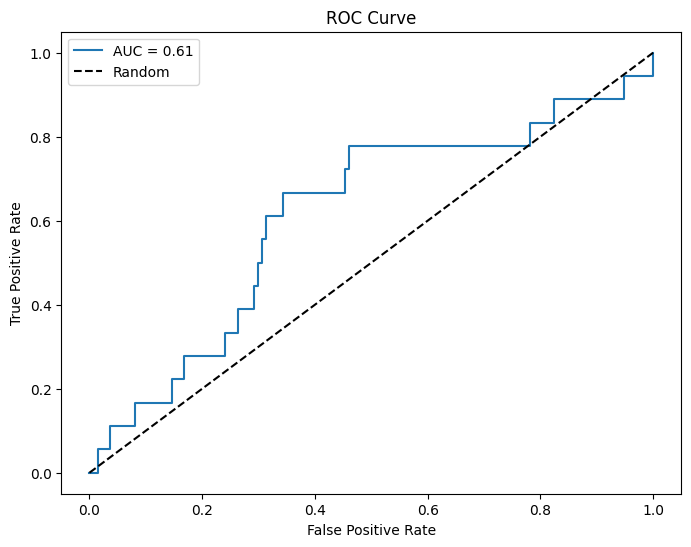

In [139]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Choose a threshold (e.g., 0.5)
threshold = 0.61

# Convert probabilities to binary predictions
j_binary_predictions = (j_predictions > threshold).astype(int)

# Evaluate accuracy
accuracy = accuracy_score(y_test, j_binary_predictions)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, j_binary_predictions))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, j_binary_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# ROC Curve and AUC
roc_auc = roc_auc_score(y_test, j_predictions)
fpr, tpr, thresholds = roc_curve(y_test, j_predictions)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [140]:
df_all_cleaned['j_predictions'] = j_binary_predictions
df_all_cleaned

,auhtor_ID,post,extrovert,feeling,judging,sensing,processed_post,bert_embeddings,e_predictions,f_predictions,j_predictions
0,t2_12bhu7,I wear a Lorna shore shirt out alot in public ...,1,1,0,0,wear lorna shore shirt alot public lewd long s...,"[0.03740044, 0.03744348, 0.40402788, -0.154586...",0,0,0
1,t2_12jbpd,I'd say this is a very accurate characterizati...,1,0,0,0,id say accurate characterization ni users read...,"[-0.122634806, 0.06978733, 0.23516777, -0.1674...",0,0,0
2,t2_12uwr5,Ya know like most people with home decorations...,0,0,1,0,ya know like people home decorations could sav...,"[0.10358047, -0.079817355, 0.4862674, 0.006832...",0,0,1
3,t2_12zm15,It's true tho. They're kinda more interesting ...,0,1,0,0,true tho theyre kinda interesting buuuut issue...,"[-0.11131706, 0.070213296, 0.5168624, 0.017204...",1,0,1
4,t2_13cjjl,"Yeah, but that's one of the things that make m...",0,0,0,1,yeah thats one things make better objectively ...,"[0.21926472, 0.11031033, 0.28619415, 0.1073027...",0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
150,t2_vfp8y,so change profession then. this would be inadm...,0,0,1,0,change profession would inadmissible country p...,"[-0.17524596, 0.1841626, 0.44777465, -0.118973...",0,0,1
151,t2_w0842,The technological singularity. And the possibi...,0,0,1,0,technological singularity possibility contribu...,"[-0.025105778, -0.08084041, 0.3463775, -0.0189...",0,0,0
152,t2_w6rgl,Dear God man. Chill. I'm not Einstein or Hawki...,0,0,1,0,dear god man chill im einstein hawking serious...,"[0.088415004, 0.22571912, 0.38455746, -0.03194...",0,0,1
153,t2_wilcwvo,That's what a fake lib would say [Human blood ...,1,0,0,0,thats fake lib would say human blood water url...,"[0.05957357, 0.10176626, 0.3839616, -0.0742901...",0,0,0


In [115]:
df_sensing_intuitive_joined_sampled_preprocessed

,auhtor_ID,post,sensing,preprocessed_post,bert_embeddings
0,t2_10c5y8,"&gt;but peeps still figured those out. Yeah, v...",1,gtbut peeps still figured yeah via datamining ...,"[-0.16891608, -0.13600245, 0.31966513, 0.02359..."
1,t2_10yl6g2x,I had a couple guys try to bully me when I cam...,1,couple guys try bully came high school laughed...,"[-0.060044073, 0.0022919104, 0.34724367, -0.13..."
2,t2_11wkz33k,I think we're finally in a state we're the mar...,1,think finally state marksmen class fine par pe...,"[0.041534685, 0.06926767, 0.39794186, 0.046810..."
3,t2_12t59p,"My kinda guy ‘No, sir, really. You want some p...",1,kinda guy sir really want plausible deniabilit...,"[-0.040683974, 0.14206512, 0.33123603, 0.07731..."
4,t2_170dhg,bUT tHey wAnTEd TO oVeRthROw tHe GoVErNmeNT! T...,1,wanted overthrow government new snow globe voi...,"[0.0063250717, 0.054067917, 0.49452013, 0.0832..."
...,...,...,...,...,...
402,t2_3jixc,Small talk exists to establish a baseline leve...,0,small talk exists establish baseline level com...,"[0.053859785, 0.11540638, 0.31130522, 0.059195..."
403,t2_bsc8kceb,"he is a rational person. talk to him, make him...",0,rational person talk make rationalize feelings...,"[-0.16810663, 0.02008041, 0.27002156, 0.069754..."
404,t2_9204xkvq,I don't know if this will help in your situati...,0,dont know help situation ago struggling audio ...,"[-0.22008428, -0.07569327, 0.43889418, 0.02908..."
405,t2_1novx2a2,You find someone who's actually good for you. ...,0,find someone whos actually good focus things a...,"[0.08293104, 0.035565473, 0.23323825, -0.02762..."


In [116]:
# Train-test split
X_train = np.vstack(df_sensing_intuitive_joined_sampled_preprocessed['bert_embeddings'])
X_test = np.vstack(df_all_cleaned['bert_embeddings'])
y_train = np.vstack(df_sensing_intuitive_joined_sampled_preprocessed['sensing'])
y_test = np.vstack(df_all_cleaned['sensing'])

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(407, 768) (407, 1) (155, 768) (155, 1)


In [118]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Build a simple neural network model
model = Sequential([
    Dense(800, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(155, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Predictions
s_predictions = model.predict(X_test)

Epoch 1/10
13/13 [==============================] - 1s 28ms/step - loss: 0.6854 - accuracy: 0.5872 - val_loss: 0.9599 - val_accuracy: 0.1161
Epoch 2/10
13/13 [==============================] - 0s 7ms/step - loss: 0.6374 - accuracy: 0.6314 - val_loss: 1.1753 - val_accuracy: 0.1161
Epoch 3/10
13/13 [==============================] - 0s 8ms/step - loss: 0.6309 - accuracy: 0.6560 - val_loss: 1.1602 - val_accuracy: 0.1161
Epoch 4/10
13/13 [==============================] - 0s 9ms/step - loss: 0.6207 - accuracy: 0.6388 - val_loss: 0.9171 - val_accuracy: 0.1871
Epoch 5/10
13/13 [==============================] - 0s 10ms/step - loss: 0.6228 - accuracy: 0.6683 - val_loss: 0.7919 - val_accuracy: 0.4839
Epoch 6/10
13/13 [==============================] - 0s 8ms/step - loss: 0.6029 - accuracy: 0.6880 - val_loss: 0.8767 - val_accuracy: 0.4194
Epoch 7/10
13/13 [==============================] - 0s 14ms/step - loss: 0.5803 - accuracy: 0.6806 - val_loss: 1.1132 - val_accuracy: 0.2323
Epoch 8/10
13/13 

In [119]:
df_all_cleaned['sensing'].value_counts()

0    137
1     18
Name: sensing, dtype: int64

Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       137
           1       0.23      0.17      0.19        18

    accuracy                           0.84       155
   macro avg       0.56      0.55      0.55       155
weighted avg       0.82      0.84      0.83       155

Confusion Matrix:
[[127  10]
 [ 15   3]]


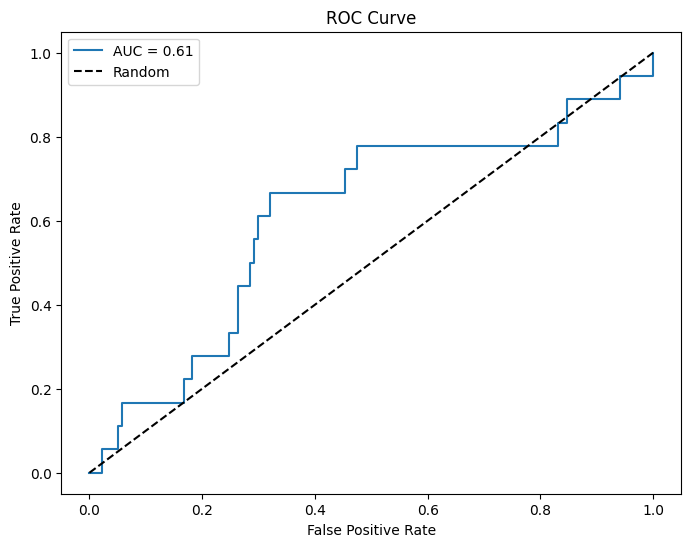

In [141]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Choose a threshold (e.g., 0.5)
threshold = 0.88

# Convert probabilities to binary predictions
s_binary_predictions = (s_predictions > threshold).astype(int)

# Evaluate accuracy
accuracy = accuracy_score(y_test, s_binary_predictions)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, s_binary_predictions))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, s_binary_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# ROC Curve and AUC
roc_auc = roc_auc_score(y_test, s_predictions)
fpr, tpr, thresholds = roc_curve(y_test, s_predictions)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [142]:
df_all_cleaned['s_predictions'] = s_binary_predictions
df_all_cleaned

,auhtor_ID,post,extrovert,feeling,judging,sensing,processed_post,bert_embeddings,e_predictions,f_predictions,j_predictions,s_predictions
0,t2_12bhu7,I wear a Lorna shore shirt out alot in public ...,1,1,0,0,wear lorna shore shirt alot public lewd long s...,"[0.03740044, 0.03744348, 0.40402788, -0.154586...",0,0,0,0
1,t2_12jbpd,I'd say this is a very accurate characterizati...,1,0,0,0,id say accurate characterization ni users read...,"[-0.122634806, 0.06978733, 0.23516777, -0.1674...",0,0,0,0
2,t2_12uwr5,Ya know like most people with home decorations...,0,0,1,0,ya know like people home decorations could sav...,"[0.10358047, -0.079817355, 0.4862674, 0.006832...",0,0,1,0
3,t2_12zm15,It's true tho. They're kinda more interesting ...,0,1,0,0,true tho theyre kinda interesting buuuut issue...,"[-0.11131706, 0.070213296, 0.5168624, 0.017204...",1,0,1,1
4,t2_13cjjl,"Yeah, but that's one of the things that make m...",0,0,0,1,yeah thats one things make better objectively ...,"[0.21926472, 0.11031033, 0.28619415, 0.1073027...",0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
150,t2_vfp8y,so change profession then. this would be inadm...,0,0,1,0,change profession would inadmissible country p...,"[-0.17524596, 0.1841626, 0.44777465, -0.118973...",0,0,1,0
151,t2_w0842,The technological singularity. And the possibi...,0,0,1,0,technological singularity possibility contribu...,"[-0.025105778, -0.08084041, 0.3463775, -0.0189...",0,0,0,0
152,t2_w6rgl,Dear God man. Chill. I'm not Einstein or Hawki...,0,0,1,0,dear god man chill im einstein hawking serious...,"[0.088415004, 0.22571912, 0.38455746, -0.03194...",0,0,1,1
153,t2_wilcwvo,That's what a fake lib would say [Human blood ...,1,0,0,0,thats fake lib would say human blood water url...,"[0.05957357, 0.10176626, 0.3839616, -0.0742901...",0,0,0,0


In [143]:
df_all_cleaned.to_csv("neural_network.csv")